# Advanced Predictive Analytics
### Group 5: Vanessa Chanliau and Abdallah Maarouf

## Stacking for Heterogenous Treatment Effects

- Introduction
 - Topic
 - Motivation
- Literature Review
- Application
 - Data Generation
 - Using double machine learning
 - Using R-Learner
 - Evaluation of treatment effect estimation when using only one model
 - Stacking using Super Learner
 - Evaluation after stacking and comparison
- Conclusion


# <span style="color:red">Insert introduction, topic, motivation, literature review here</span>

# Application
 ## Data Generation
 For data generation, we decided to use the [opossum package explained here.](https://humboldt-wi.github.io/blog/research/applied_predictive_modeling_19/data_generating_process_blogpost/#Example:-Applying-double-machine-learning) The library is provided [here.](https://github.com/jgitr/opossum)
 
 

In [1]:
%pip install opossum


Note: you may need to restart the kernel to use updated packages.


'c:\users\alex' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from opossum import UserInterface
# number of observations N and number of covariates k
N = 10000
k = 50
# initilizing class
u = UserInterface(N, k, seed=1, categorical_covariates = None)
# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = True, 
                     assignment_prob = 0.5, 
                     constant_pos = False, 
                     constant_neg = False,
                     heterogeneous_pos = False, 
                     heterogeneous_neg = False, 
                     no_treatment = False, 
                     discrete_heterogeneous = True,
                     treatment_option_weights = None, 
                     intensity = 5)
# generate output variable y and return all 4 variables
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'partial_nonlinear_simple')

In [3]:
print('y:', y)
print('X:', X)
print('assignment:', assignment)
print('treatment:', treatment)

y: [ 4.16994681  1.57187315 -1.28494508 ...  1.30579824 -0.13093045
  1.46044035]
X: [[ 0.45964025 -0.65336079  1.73929275 ...  0.66234525 -0.46020249
  -0.2696087 ]
 [ 0.52121688 -0.84512238  0.58918171 ... -0.65431298 -0.45540562
  -0.53901879]
 [ 1.1175185  -0.22318138  1.64659613 ... -0.03963994 -0.87405296
   0.27389638]
 ...
 [ 0.8297609  -0.04765842  1.0980737  ...  0.02943596  1.43387277
  -0.12644993]
 [-0.20471307  0.88729873  0.64399408 ...  1.07613683  0.38051625
   0.54263567]
 [ 1.51404607 -1.994225   -0.12169871 ... -0.43031059  0.17972622
   0.12363892]]
assignment: [0 0 1 ... 1 0 0]
treatment: [0.  0.  0.5 ... 1.  0.  0. ]


In [4]:
len(assignment)

10000

At this point, our virtual environment consists of:

- X: Matrix of size N*k, representing feature covariates. 
- y: List if size N, representing output variable.
- assignment: List of size N, representing whether the observation was treated or not.
- treatment: List of size N, which is the true treatment effect.

In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


'c:\users\alex' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!pip install mlens

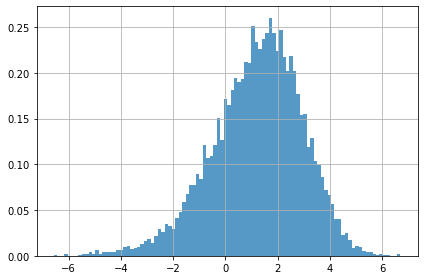

In [7]:
import matplotlib.pyplot as plt
import numpy as np

n, bins, patches = plt.hist(y, 100, density=0.1, alpha=0.75)
plt.tight_layout()
plt.grid(True)
plt.show()

# <span style="color:red">Insert some graph plots here</span>

# <span style="color:red">Insert double machine learning method here</span> 
[Link to beginning point](https://humboldt-wi.github.io/blog/research/applied_predictive_modeling_19/double_machine_learning/)

# <span style="color:red">Insert R-learner method here</span> 
[Link to beginning point](https://github.com/xnie/rlearner)

# <span style="color:red">Insert models we should use here</span>
## First, models that can be used with r-learner (minimizing risiduals models)
## Then, models we choose to implement mentioned in grimmer et al (don't forget to mention parameter tuning)

In [8]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from math import floor

### Add assignment as a variable

In [9]:
df = pd.DataFrame(X)

In [10]:
df['assignment'] = assignment

In [11]:
Xa = df.values

### Split into training and test

In [12]:
n_samples = X.shape[0]
n_train = floor(n_samples*0.8)
X_train, y_train = X[:n_train], treatment[:n_train]
X_test, y_test = X[n_train:], treatment[n_train:]

### Lasso model

In [47]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.001)
r^2 on test data : 0.016407


In [48]:
lassomse = mean_squared_error(y_test, y_pred_lasso)
lassomse

0.17223795126485256

### Elastic Net

In [15]:
from sklearn.linear_model import ElasticNet

In [16]:
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.001, l1_ratio=0.7)
r^2 on test data : 0.016188


In [17]:
enetmse = mean_squared_error(y_test, y_pred_enet)
enetmse

0.1722761838038364

### Random Forest

In [18]:
RF = RandomForestRegressor()
y_pred_rf = RF.fit(X_train, y_train).predict(X_test)


In [19]:
r2_score_rf = r2_score(y_test, y_pred_rf)
print(RF)
print("r^2 on test data : %f" % r2_score_rf)

RandomForestRegressor()
r^2 on test data : -0.009495


In [20]:
rfmse = mean_squared_error(y_test, y_pred_rf)
rfmse

0.17677362500000002

### Support Vector Machines


In [21]:
svmregr = svm.SVR()
y_pred_svm = svmregr.fit(X_train, y_train).predict(X_test)

In [22]:
r2_score_svm = r2_score(y_test, y_pred_svm)
print(svmregr)
print("r^2 on test data : %f" % r2_score_svm)

SVR()
r^2 on test data : -0.147039


In [23]:
svmmse = mean_squared_error(y_test, y_pred_svm)
svmmse

0.20085913486795137

# <span style="color:red">Insert Super learner here (Most improtant step)</span> 

In [24]:
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [25]:
ensemble = SuperLearner(scorer=mean_squared_error, random_state=1)
ensemble.add([RF, svmregr])
ensemble.add([enet, lasso])
ensemble.add_meta(RF)


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...597C6A0>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function mean_squared_error at 0x2597C6A0>, shuffle=False,
       verbose=False)

In [26]:
y_ensemble_pred = ensemble.fit(X_train, y_train).predict(X_test)

In [27]:
r2_score_ensemble = r2_score(y_test, y_ensemble_pred)
print(ensemble)
print("r^2 on test data : %f" % r2_score_ensemble)

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...597C6A0>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function mean_squared_error at 0x2597C6A0>, shuffle=False,
       verbose=False)
r^2 on test data : -0.076991


In [28]:
ensemblemse = mean_squared_error(y_test, y_ensemble_pred)
ensemblemse

0.18859285927740002

### What's next: feature engineering